In [1]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [2]:
%%time
base_path = r"C:\Users\mathe\Downloads\dataset\ecommerce products"
consulta_path = r"C:\Users\mathe\Downloads\consulta"

# Carregar modelo pré-treinado ResNet50
modelo = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Extrair features da imagem
def extrair_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = modelo.predict(img_array)
    return features.flatten()

# Recomendar imagens similares
def recomendar_imagem(img_consulta):
    features_consulta = extrair_features(img_consulta)
    similaridade_resultados = {}
    for classe in os.listdir(base_path):
        caminho_classe = os.path.join(base_path, classe)
        if os.path.isdir(caminho_classe):
            for arquivo in os.listdir(caminho_classe):
                img_path = os.path.join(caminho_classe, arquivo)
                features_img = extrair_features(img_path)
                similaridade = cosine_similarity([features_consulta], [features_img])[0][0]
                similaridade_resultados[img_path] = similaridade

    recomendacoes = sorted(similaridade_resultados.items(), key=lambda x: x[1], reverse=True)[:5]
    img = image.load_img(img_consulta)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 6, 1)
    plt.imshow(img)
    plt.title("Consulta")
    plt.axis('off')
    for i, (caminho, sim) in enumerate(recomendacoes):
        img_rec = image.load_img(caminho)
        plt.subplot(1, 6, i + 2)
        plt.imshow(img_rec)
        plt.title(f"{sim:.2f}")
        plt.axis('off')

    plt.show()

CPU times: total: 1.03 s
Wall time: 2.59 s



Recomendando imagens similares para: jeans-teste.jpg
1/1 [==============================] - 0s 31ms/step


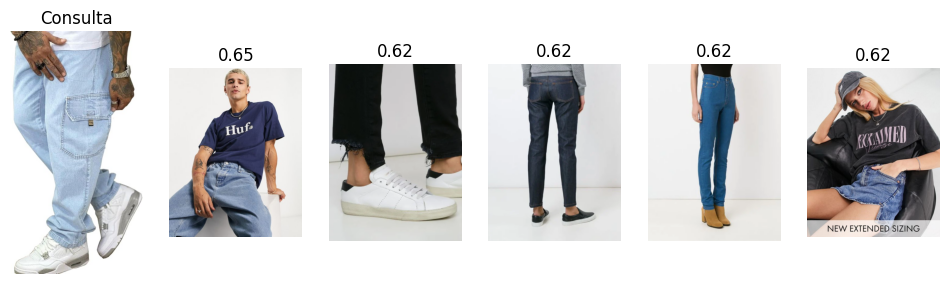


Recomendando imagens similares para: sofa-teste.jpg
1/1 [==============================] - 0s 31ms/step


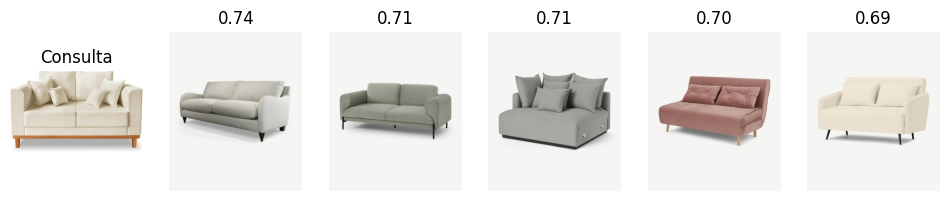


Recomendando imagens similares para: tshirt-teste.jpg
1/1 [==============================] - 0s 16ms/step


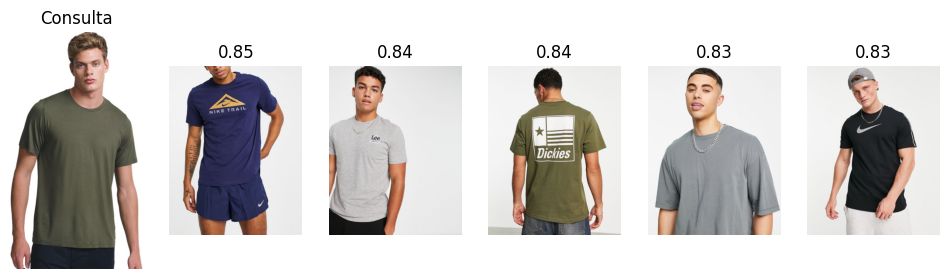


Recomendando imagens similares para: tv-teste.jpg
1/1 [==============================] - 0s 31ms/step


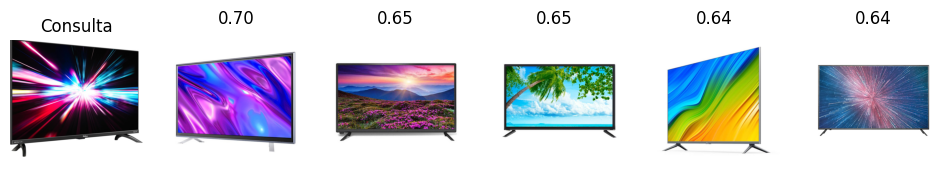

CPU times: total: 1min 32s
Wall time: 4min 16s


In [3]:
%%time
# Teste com imagens na pasta consulta
for img_consulta in os.listdir(consulta_path):
    caminho_img_consulta = os.path.join(consulta_path, img_consulta)
    print(f"\nRecomendando imagens similares para: {img_consulta}")
    recomendar_imagem(caminho_img_consulta)